In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from src.run_gsort_v2_wuericmod import *
import src.utilities.electrode_map as emap
from src.eierflib import smart_fit, sigmoid
import src.post_processing_utils as gpa
import pandas as pd
import tqdm
# from run_gsort_v2_wuericmod import *
# import gsort_post_analysis as gpa

/Volumes/Lab/Users/jeffbrown/g-sort/src/utilities/electrode_map.py:1448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LITKE_512_ARRAY_ADJ_MAT = np.array([
/Volumes/Lab/Users/jeffbrown/g-sort/src/utilities/electrode_map.py:3443: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LITKE_519_ARRAY_ADJ_MAT = np.array([


/Volumes/Lab/Users/jeffbrown/g-sort/src/utilities/visionloader.py


# Load Data

In [5]:
final_gsort_output = pd.read_csv("/Volumes/Lab/Users/jeffbrown/g-sort/data/final_analysis.csv")


In [6]:
# final_gsort_output = final_gsort_output.drop(['amps_gsort', 'probs_gsort', 'probs_gsort_plus'], axis = 1)

In [7]:
final_gsort_output.keys()

Index(['Unnamed: 0', 'piece', 'ei_dataset', 'stim_dataset', 'elecInd', 'cell',
       'eiVal', 'celltype', 'compartment', 'threshold_gsort', 'slope_gsort',
       'amps_gsort', 'probs_gsort', 'threshold_gsort_plus', 'slope_gsort_plus',
       'probs_gsort_plus', 'region'],
      dtype='object')

# Periphery Plot

In [348]:
file = open('/Volumes/Lab/Users/Sasi/pystim/scripts/ei_erf_analysis/ei_erf_final_push_june20/dfMMergedEiErf.p', 'rb')
dfMMergedAll4 = pickle.load(file)

dfMan = dfMMergedAll4[dfMMergedAll4['threshold_manual'].between(0,5,inclusive=False)]


/tmp/ipykernel_5279/2595756558.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  dfMan = dfMMergedAll4[dfMMergedAll4['threshold_manual'].between(0,5,inclusive=False)]


In [349]:
badAutosort = ['2015-11-09-3/-7081-5-data000','2015-11-09-3/-1081-72-data000','2015-11-09-3/-966-80-data000',
               '2015-11-09-3/-993-58-data000','2015-11-09-3/-4774-310-data000','2015-11-09-3/-6076-405-data000',
               '2015-11-09-3/-6076-413-data000','2015-11-09-3/-6813-453-data000','2015-11-09-3/-6931-462-data000',
               '2015-11-09-3/-6931-469-data000','2016-01-05-6/-304-32-data001','2016-01-05-6/-3976-70-data001',
               '2016-01-05-6/-1804-121-data001','2016-01-05-6/-1711-122-data001','2016-01-05-6/-2432-162-data001',
               '2016-01-05-6/-5002-320-data001','2016-01-05-6/-7026-475-data001','2016-01-05-6/-7126-475-data001',
               '2015-05-27-0/-6856-0-data000','2015-05-27-0/-7206-2-data000','2015-05-27-0/-154-104-data000',
               '2015-09-23-3/-3347-257-data005','2015-05-27-0/-5629-358-data000','2015-09-23-3/-4042-272-data005',
               '2015-09-23-3/-4578-293-data005','2015-09-23-3/-5061-337-data005','2015-09-23-3/-5237-341-data005',
               '2015-09-23-3/-4936-329-data005','2015-04-09-2/-7321-6-data001','2015-04-09-2/-256-20-data001',
               '2015-04-09-2/-1231-78-data001','2015-04-09-2/-1231-85-data001','2015-04-09-2/-1336-85-data001',
               '2015-04-09-2/-7321-488-data001','2012-09-24-0/-332-19-data006','2012-09-24-0/-1816-121-data006',
               '2012-09-24-0/-3226-214-data006','2012-09-24-0/-4696-309-data006','2012-09-24-0/-7025-468-data006',
               '2012-09-24-0/-7025-469-data006','2016-04-21-10/-4222-88-data001','2016-04-21-10/-5011-338-data001',
               '2016-04-21-10/-6513-450-data001','2015-10-06-6/-785-36-data002','2015-10-06-6/-738-52-data002',
               '2015-10-06-6/-3196-205-data002','2015-10-06-6/-1801-259-data002','2017-10-30-2/-3320-253-data000',
               '2017-10-30-2/-3320-254-data000','2017-10-30-2/-4577-305-data000','2015-03-09-0/-5057-325-data000',
               '2015-03-09-0/-5182-358-data000','2020-01-30-5/-4036-262-data000','2018-02-09-5/-215-19-data000',
               '2018-02-09-5/-3888-124-data000']
badAutosort2 = ['2015-11-09-3/-5583-372-data000','2015-11-09-3/-6335-415-data000','2015-11-09-3/-6335-421-data000',
                '2015-09-23-3/-4666-311-data005','2012-09-24-0/-94-11-data006','2012-09-24-0/-1816-203-data006',
                '2012-09-24-0/-6241-288-data006','2012-09-24-0/-6827-302-data006','2012-09-24-0/-6376-416-data006',
                '2016-04-21-10/-4222-286-data001','2016-04-21-10/-5116-337-data001','2016-04-21-10/-6513-507-data001',
                '2015-10-06-6/-738-49-data002','2015-10-06-6/-871-278-data002','2017-10-30-2/-4576-46-data000',
                '2015-03-09-0/-5182-350-data000','2018-02-09-5/-1188-366-data000','2016-04-21-10/-3451-222-data001'] #found on 2nd in-depth pass below

In [350]:
def refitMan(row):
    pointsToCut = 0
    if not np.all(np.isnan(row['probs_manual'])):
        threshJ,slopeJ = gpa.infer_sigmoid(np.array(row['probs_manual'][pointsToCut:]),
                                           np.array(row['amps_manual'][pointsToCut:]),
                                           mono_threshold=0.10,noise_limit=0.19, kind='add')
                                           #mono_threshold=0.05,noise_limit=0.05, kind='add')
    else:
        threshJ,slopeJ = [np.nan,np.nan]
    return threshJ,slopeJ

dfMan['threshold_manual_smart'],dfMan['slope_manual_smart'] = zip(*dfMan.apply(refitMan,axis=1))

# dfMan= dfMan[~(dfMan['piece-cell-electrode-ei'].isin(badAutosort+badAutosort2))]
dfMan= dfMan[~(dfMan['piece-cell-electrode-ei'].isin(badAutosort+badAutosort2))]

/tmp/ipykernel_5279/510070062.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMan['threshold_manual_smart'],dfMan['slope_manual_smart'] = zip(*dfMan.apply(refitMan,axis=1))
/tmp/ipykernel_5279/510070062.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMan['threshold_manual_smart'],dfMan['slope_manual_smart'] = zip(*dfMan.apply(refitMan,axis=1))


In [360]:
len(set(dfMan['piece']))

10

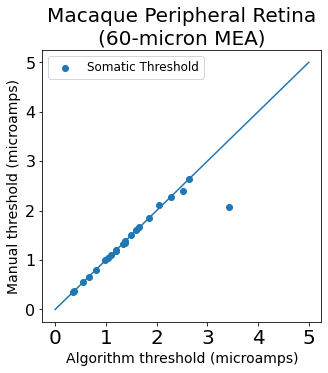

In [208]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5 )) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
man_thrs = []
gsort_thrs = []
for cell, elecInd, threshold_manual, piece in zip(dfMan['cell'].astype(int), dfMan['elecInd'].astype(int), dfMan['threshold_manual'],  dfMan['piece']):
#     print(cell, elecInd, threshold_manual, piece.split('/')[0])
    
    tmp_df = final_gsort_output[(final_gsort_output['piece']==piece.split('/')[0])*(final_gsort_output['cell']==cell)*(final_gsort_output['elecInd']==elecInd)]
    thr = tmp_df['threshold_gsort']
    if len(thr):
        gsort_thrs += [thr.iloc[0]]
        man_thrs += [threshold_manual]
ax.scatter(man_thrs, gsort_thrs, label = "Somatic Threshold")
ax.plot([0, 5], [0, 5])
ax.set_xlabel("Algorithm threshold (microamps)", fontsize = 14)
ax.set_ylabel("Manual threshold (microamps)", fontsize = 14)
ax.set_title("Macaque Peripheral Retina\n(60-micron MEA)", fontsize = 20)
ax.legend(fontsize = 12)


# 30-micron periphery

In [12]:
dataset_path_dict = dict()
dataset_path_dict['2016-06-13-0'] = dict()
dataset_path_dict['2016-06-13-0']['location'] = 'periphery'
dataset_path_dict['2016-06-13-0']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2016-06-13-0']['vision_eidir'] = 'data000'
dataset_path_dict['2016-06-13-0']['seldir'] = 'data001'

dataset_path_dict['2016-06-13-8'] = dict()
dataset_path_dict['2016-06-13-8']['location'] = 'periphery'
dataset_path_dict['2016-06-13-8']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2016-06-13-8']['vision_eidir'] = 'data000'
dataset_path_dict['2016-06-13-8']['seldir'] = 'data001'

dataset_path_dict['2016-06-13-9'] = dict()
dataset_path_dict['2016-06-13-9']['location'] = 'periphery'
dataset_path_dict['2016-06-13-9']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2016-06-13-9']['seldir'] = 'data001'
dataset_path_dict['2016-06-13-9']['vision_eidir'] = 'data000'


dataset_path_dict['2017-11-20-9'] = dict()
dataset_path_dict['2017-11-20-9']['location'] = 'periphery'
dataset_path_dict['2017-11-20-9']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2017-11-20-9']['vision_eidir'] = 'data000'
dataset_path_dict['2017-11-20-9']['seldir'] = 'data002'

dataset_path_dict['2020-09-12-4'] = dict()
dataset_path_dict['2020-09-12-4']['location'] = 'periphery'
dataset_path_dict['2020-09-12-4']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-09-12-4']['vision_eidir'] = 'data000'
dataset_path_dict['2020-09-12-4']['seldir'] = 'data001'


dataset_path_dict['2020-10-06-5'] = dict()
dataset_path_dict['2020-10-06-5']['location'] = 'periphery'
dataset_path_dict['2020-10-06-5']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-10-06-5']['vision_eidir'] = 'data000'
dataset_path_dict['2020-10-06-5']['seldir'] = 'data001'

dataset_path_dict['2020-10-06-7'] = dict()
dataset_path_dict['2020-10-06-7']['location'] = 'periphery'
dataset_path_dict['2020-10-06-7']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-10-06-7']['vision_eidir'] = 'data000'
dataset_path_dict['2020-10-06-7']['seldir'] = 'data001'

dataset_path_dict['2020-10-18-5'] = dict()
dataset_path_dict['2020-10-18-5']['location'] = 'periphery'
dataset_path_dict['2020-10-18-5']['eidir'] = 'kilosort_data002/data002'
dataset_path_dict['2020-10-18-5']['vision_eidir'] = 'data002'
dataset_path_dict['2020-10-18-5']['seldir'] = 'data001'

dataset_path_dict['2019-06-20-0'] = dict()
dataset_path_dict['2019-06-20-0']['location'] = 'raphe'
dataset_path_dict['2019-06-20-0']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2019-06-20-0']['vision_eidir'] = 'data000-cf'
dataset_path_dict['2019-06-20-0']['seldir'] = 'data001'

dataset_path_dict['2018-03-01-1'] = dict()
dataset_path_dict['2018-03-01-1']['location'] = 'raphe'
dataset_path_dict['2018-03-01-1']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2018-03-01-1']['vision_eidir'] = 'data000'
dataset_path_dict['2018-03-01-1']['seldir'] = 'data001'

dataset_path_dict['2019-11-07-2'] = dict()
dataset_path_dict['2019-11-07-2']['location'] = 'raphe'
dataset_path_dict['2019-11-07-2']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2019-11-07-2']['vision_eidir'] = 'data000'
dataset_path_dict['2019-11-07-2']['seldir'] = 'data001'

dataset_path_dict['2020-01-30-1'] = dict()
dataset_path_dict['2020-01-30-1']['location'] = 'raphe'
dataset_path_dict['2020-01-30-1']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-01-30-1']['vision_eidir'] = 'data000'
dataset_path_dict['2020-01-30-1']['seldir'] = 'data001'

dataset_path_dict['2020-02-27-2'] = dict()
dataset_path_dict['2020-02-27-2']['location'] = 'raphe'
dataset_path_dict['2020-02-27-2']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-02-27-2']['vision_eidir'] = 'data000'
dataset_path_dict['2020-02-27-2']['seldir'] = 'data001'

dataset_path_dict['2020-09-29-2'] = dict()
dataset_path_dict['2020-09-29-2']['location'] = 'raphe'
dataset_path_dict['2020-09-29-2']['eidir'] = 'kilosort_data002/data002'
dataset_path_dict['2020-09-29-2']['vision_eidir'] = 'data002'
dataset_path_dict['2020-09-29-2']['seldir'] = 'data003'

dataset_path_dict['2020-10-18-0'] = dict()
dataset_path_dict['2020-10-18-0']['location'] = 'raphe'
dataset_path_dict['2020-10-18-0']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-10-18-0']['vision_eidir'] = 'data000'
dataset_path_dict['2020-10-18-0']['seldir'] = 'data001'

dataset_path_dict['2021-05-27-0'] = dict()
dataset_path_dict['2021-05-27-0']['location'] = 'raphe'
dataset_path_dict['2021-05-27-0']['eidir'] = 'kilosort_data001/data001'
dataset_path_dict['2021-05-27-0']['vision_eidir'] = 'kilosort_data001/data001'
dataset_path_dict['2021-05-27-0']['seldir'] = 'data002'

In [117]:
badManual = ['elecResp_n948_p64_r75.mat', 'elecResp_n1052_p67_r63.mat', 'elecResp_n1055_p133_r131.mat',
            'elecResp_n6376_p416_r426.mat', 'elecResp_n7096_p475_r474.mat', 'elecResp_n1789_p111_r111.mat',
            'elecResp_n1658_p111_r111.mat', 'elecResp_n1351_p82_r82.mat', 'elecResp_n1321_p76_r76.mat',
            'elecResp_n7608_p9_r508.mat', 'elecResp_n1456_p90_r98.mat', 'elecResp_n676_p27_r46.mat',
            'elecResp_n124_p19_r9.mat', 'elecResp_n229_p25_r16.mat', 'elecResp_n7234_p482_r483.mat',
            'elecResp_n1955_p133_r131.mat']

In [361]:
raphe_elecRespList_path = "/Volumes/Lab/Users/AlexG/pystim/analysis/30um-raphe-analysis/"
configurations_list = []
piece_list = []
for piece in [p+'/' for p in dataset_path_dict.keys()]:#['2021-05-27-4/', '2020-02-27-2/','2019-06-20-0/', '2018-03-01-1/', '2018-11-12-1/', '2018-12-10-1/', '2018-12-10-4/', '2019-03-06-1/', '2019-11-07-2/', '2020-01-30-1/']:

    try:
        
        with open(os.path.join(raphe_elecRespList_path, piece,'elecRespList.txt'), 'r') as f:
            
            configurations = f.readlines()
            configurations = [config[:-1] for config in configurations if ((config[0] != '#') and (config[:-1] not in badManual ))]
        configurations_list += configurations
        piece_list += [piece]*len(configurations)
        print(piece)
    except:
        continue


2019-06-20-0/
2018-03-01-1/
2019-11-07-2/
2020-01-30-1/
2020-02-27-2/
2021-05-27-0/


In [362]:
piece_to_vision_to_kilosort = {}
cell_to_ei = {}
for piece in set(piece_list):
    PARENT_ANALYSIS = '/Volumes/Analysis/'
    PARENT_DATA = '/Volumes/Data/' 
    vstim_analysis_path = PARENT_ANALYSIS+piece +'/'
    
    vision_vstim_datarun = dataset_path_dict[piece.split('/')[0]]['vision_eidir']
    kilo_vstim_datarun = dataset_path_dict[piece.split('/')[0]]['eidir']

    vision_vstim_data = vl.load_vision_data(vstim_analysis_path + vision_vstim_datarun,
                                      vision_vstim_datarun.split('/')[-1],
                                      include_params=True,
                                      include_ei=True,
                                     )
    kilo_vstim_data = vl.load_vision_data(vstim_analysis_path + kilo_vstim_datarun,
                                      kilo_vstim_datarun.split('/')[-1],
                                      include_params=True,
                                      include_ei=True,
                                    )
    
    vision_to_kilosort = {}
    kilo_cellids = list(set(kilo_vstim_data.get_cell_ids())-set(kilo_vstim_data.get_all_cells_similar_to_type('bad'))-set(kilo_vstim_data.get_all_cells_similar_to_type('dup')))

    c_list = [c for i, c in enumerate(configurations_list) if piece_list[i]==piece]
    for config in set(c_list):
        n = int(config[config.find('_n')+2:config.find('_p')])
        p = int(config[config.find('_p')+2:config.find('_r')])
        if n in vision_to_kilosort.keys():
            continue
        else:
            vision_ei = np.max(np.abs(vision_vstim_data.get_ei_for_cell(n).ei), axis = 1)

            kilo_eis = [np.max(np.abs(kilo_vstim_data.get_ei_for_cell(n_other).ei), axis = 1) for n_other in  kilo_cellids]

            best_match = np.argmax([np.sum(vision_ei * k) / np.sqrt(sum(vision_ei**2)) / np.sqrt(sum(k**2)) for k in kilo_eis])
            vision_to_kilosort[n] = kilo_cellids[best_match]
            
            ei = kilo_vstim_data.get_ei_for_cell( kilo_cellids[best_match]).ei[p-1,:]
            cell_to_ei[kilo_cellids[best_match]] = ei
    piece_to_vision_to_kilosort[piece]=vision_to_kilosort
    
    

In [363]:
gsort_probs_list = []
manual_probs_list = []
kilo_cells = []
compartment_list = []
gsort_threshold = []
manual_thresholds = []
max_manual_amplitude = []
chosen_piece_list = []
chosen_config_list = []
max_amplitude = []

for piece, config in zip(piece_list, configurations_list):
    
    n = int(config[config.index('_n')+2:config.index('_p')])
    p = int(config[config.index('_p')+2:config.index('_r')])
    vision_to_kilosort = piece_to_vision_to_kilosort[piece]
    n_kilo = vision_to_kilosort[n]
    
    ei = cell_to_ei[n_kilo] 
    compartment_list += [eil.axonorsomaRatio(ei)]
    analysis_path = '/Volumes/Analysis/'+piece
    tmp_df = final_gsort_output[(final_gsort_output['piece']==piece.split('/')[0])*(final_gsort_output['elecInd']==(p-1))*(final_gsort_output['cell']==n_kilo)]
    if len(tmp_df['threshold_gsort']):
        
        estim_datarun = dataset_path_dict[piece.split('/')[0]]['seldir']
        er = el.ElecRespReader(analysis_path +  estim_datarun,config)
        elecresp_dict = er.get_elecresp_dict()
        
        manual_sigmoid = elecresp_dict['spike_prob'].flatten()
        finalized_ = elecresp_dict['finalized'].flatten()
        manual_sigmoid = manual_sigmoid[finalized_ == 1]
        if max(manual_sigmoid) <= 0.25:
            continue
        gsort_threshold += [tmp_df['threshold_gsort'].values[0]]
        
        

        
        amplitudes = elecresp_dict['amplitudes'].flatten()
        
        

        
        max_manual_amplitude += [np.max(amplitudes[finalized_ == 1])]
        man_threshold,_, _, _ = smart_fit(amplitudes,manual_sigmoid)
        
        manual_thresholds += [man_threshold]
        gsort_probs_list += [np.fromstring(tmp_df['probs_gsort'].values[0][1:-1], sep=' ')]
        
        manual_probs_list += [manual_sigmoid]
        chosen_piece_list += [piece]
        chosen_config_list += [config]
        max_amplitude += [np.max(amplitudes)]
        
        kilo_cells += [n_kilo]
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


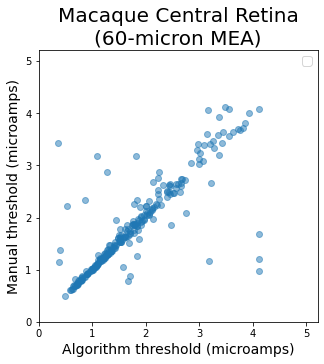

In [364]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
mt = np.array(manual_thresholds)
mt[mt >= max(max_amplitude)] = max(max_amplitude)
mt[mt == 0] = max(max_amplitude)
gt = np.array(gsort_threshold)
gt[gt >= max(max_amplitude)] = max(max_amplitude)
gt[gt == 0] = max(max_amplitude)
# ax.plot([0,max(max_amplitude)+0.1],[0,max(max_amplitude)+0.1], color = "black", zorder  =1)
# ax.plot([0.3,0.3+max(max_amplitude)+0.1],[0,max(max_amplitude)+0.1], color = "black", zorder  =1)
# ax.plot([-0.3,-0.3+max(max_amplitude)+0.1],[0,max(max_amplitude)+0.1], color = "black", zorder  =1)

ax.scatter(gt, mt, alpha = 0.5, zorder = 2)
ax.set_ylim([0,max(max_amplitude)+1.1])
ax.set_xlim([0,max(max_amplitude)+1.1])
ax.set_xlabel("Algorithm threshold (microamps)", fontsize = 14)
ax.set_ylabel("Manual threshold (microamps)", fontsize = 14)
# ax.set_title("Macaque Peripheral Retina\n(30-micron MEA)", fontsize = 20)
ax.set_title("Macaque Central Retina\n(60-micron MEA)", fontsize = 20)

ax.legend(fontsize = 12)


In [365]:
len(gt)

259

In [366]:
len(set(piece_list))

6

In [324]:
diff = gt-mt
diff_std = np.std(diff)
diff_mean = np.mean(diff)
diff_median = np.median(diff)
diff_mad = 1.4826 * np.median(np.abs(diff-diff_median))
# in_range_diff = (diff <= diff_median + 4*diff_mad)*(diff >= diff_median - 4*diff_mad)
in_range_diff = (diff <= 0.2)*(diff >= - 0.2)


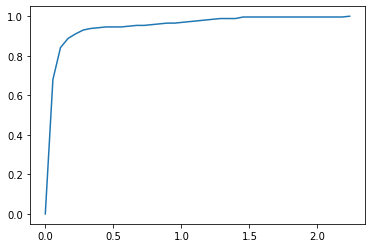

In [344]:
x, b = np.histogram(np.abs(np.log(gt/mt)), bins = 40)
plt.plot(b, np.r_[0, np.cumsum(x)]/np.sum(x))

In [346]:
np.exp(0.2) 

1.2214027581601699

(-1.0, 1.0, 0.0, 152.25)

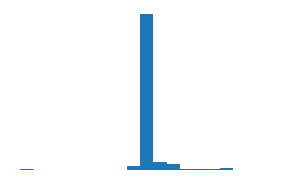

In [257]:
fig, ax = plt.subplots(1, 1, figsize = (5, 3))
ax.hist(gt-mt, range=(-1, 1), bins = 21)
ax.set_xlim([-1,1])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
# ax.vlines(diff_median + 4*diff_mad, 0, 150, color = "black")
# ax.vlines(diff_median - 4*diff_mad, 0, 150, color = "black")

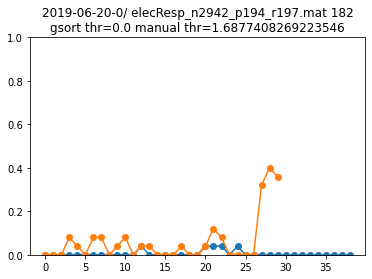

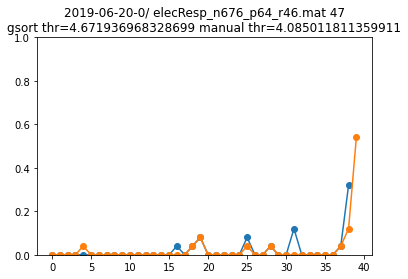

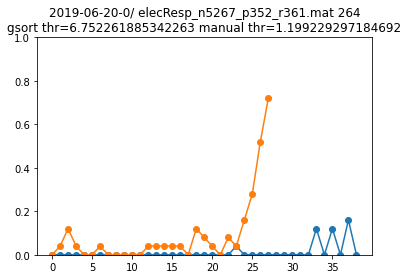

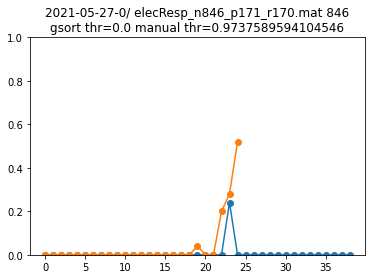

In [176]:
for i in np.where((mt<max(max_amplitude))*(gt==max(max_amplitude)))[0]:
#     print(i)
    plt.figure()
    ax = plt.subplot(111)
    ax.set_title(f"{chosen_piece_list[i]} {chosen_config_list[i]} {kilo_cells[i]}\ngsort thr={gsort_threshold[i]} manual thr={manual_thresholds[i]}")
    ax.plot(gsort_probs_list[i], '-o')
    ax.plot(manual_probs_list[i], '-o')
    ax.set_ylim([0,1])

In [164]:
gsort_probs_list = []
manual_probs_list = []
kilo_cells = []
compartment_list = []
gsort_threshold = []
manual_thresholds = []
max_manual_amplitude = []
chosen_piece_list = []
chosen_config_list = []
max_amplitude = []

for piece, config in zip(piece_list, configurations_list):
    
    n = int(config[config.index('_n')+2:config.index('_p')])
    p = int(config[config.index('_p')+2:config.index('_r')])
    vision_to_kilosort = piece_to_vision_to_kilosort[piece]
    n_kilo = vision_to_kilosort[n]
    
    ei = cell_to_ei[n_kilo] 
    compartment_list += [eil.axonorsomaRatio(ei)]
    analysis_path = '/Volumes/Analysis/'+piece
    tmp_df = final_gsort_output[(final_gsort_output['piece']==piece.split('/')[0])*(final_gsort_output['elecInd']==(p-1))*(final_gsort_output['cell']==n_kilo)]
    if len(tmp_df['threshold_gsort']):
        
        estim_datarun = dataset_path_dict[piece.split('/')[0]]['seldir']
        er = el.ElecRespReader(analysis_path +  estim_datarun,config)
        elecresp_dict = er.get_elecresp_dict()
        
        manual_sigmoid = elecresp_dict['spike_prob'].flatten()
        finalized_ = elecresp_dict['finalized'].flatten()
        manual_sigmoid = manual_sigmoid[finalized_ == 1]
        if max(manual_sigmoid) > 0.25:
            continue
        gsort_threshold += [tmp_df['threshold_gsort'].values[0]]
        
        

        
        amplitudes = elecresp_dict['amplitudes'].flatten()
        
        

        
        max_manual_amplitude += [np.max(amplitudes[finalized_ == 1])]
        man_threshold,_, _, _ = smart_fit(amplitudes,manual_sigmoid)
        
        manual_thresholds += [man_threshold]
        gsort_probs_list += [np.fromstring(tmp_df['probs_gsort'].values[0][1:-1], sep=' ')]
        
        manual_probs_list += [manual_sigmoid]
        chosen_piece_list += [piece]
        chosen_config_list += [config]
        max_amplitude += [np.max(amplitudes)]
        
        kilo_cells += [n_kilo]
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


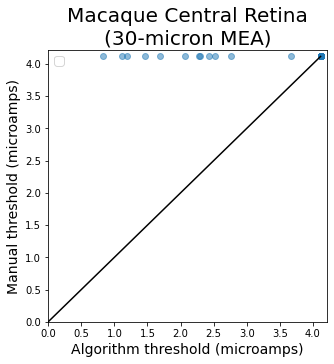

In [165]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
mt = np.array(manual_thresholds)
mt[mt >= max_manual_amplitude] = max(max_amplitude)
mt[mt == 0] = max(max_amplitude)
gt = np.array(gsort_threshold)
gt[gt >= max_manual_amplitude] = max(max_amplitude)
gt[gt == 0] = max(max_amplitude)
ax.scatter(gt, mt, alpha = 0.5)
ax.plot([0,max(max_amplitude)],[0,max(max_amplitude)], color = "black")
ax.set_ylim([0,max(max_amplitude)+.1])
ax.set_xlim([0,max(max_amplitude)+.1])
ax.set_xlabel("Algorithm threshold (microamps)", fontsize = 14)
ax.set_ylabel("Manual threshold (microamps)", fontsize = 14)
ax.set_title("Macaque Central Retina\n(30-micron MEA)", fontsize = 20)
ax.legend(fontsize = 12)


In [166]:
sum((mt==max(max_amplitude))*(gt<max(max_amplitude)))

12

In [167]:
sum((mt==max(max_amplitude)))

96

In [168]:
len(gsort_probs_list)

96

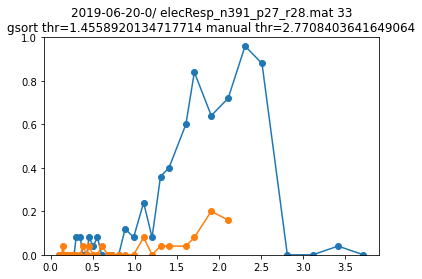

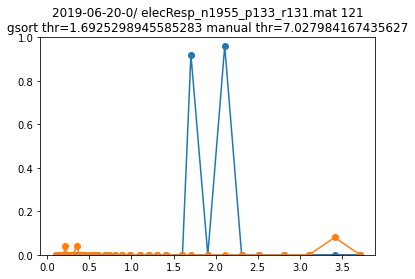

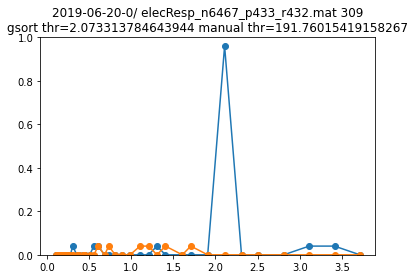

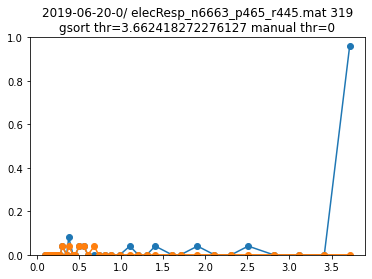

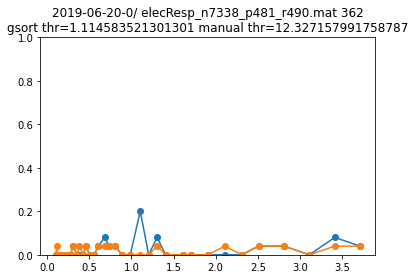

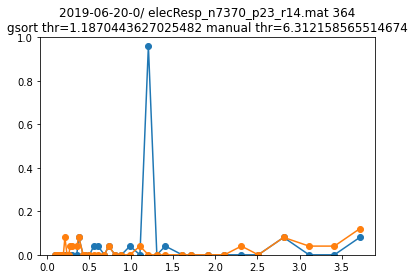

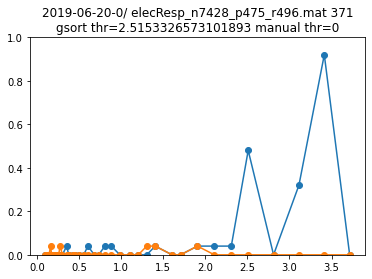

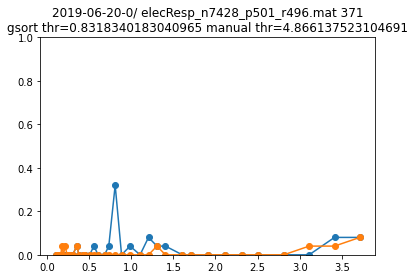

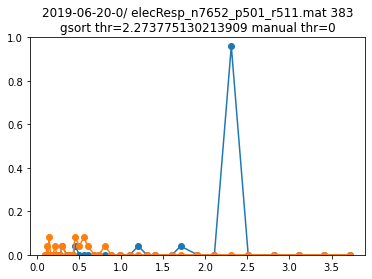

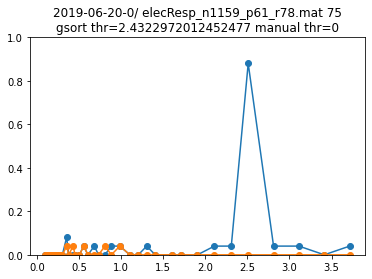

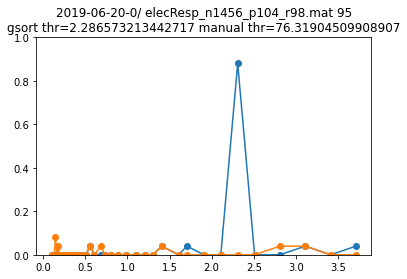

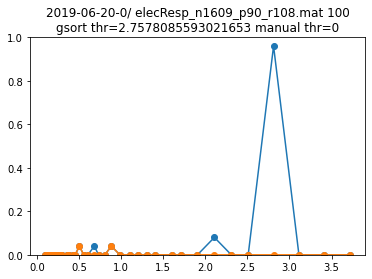

In [172]:
for i in np.where((mt==max(max_amplitude))*(gt<max(max_amplitude)))[0]:
#     print(i)
    plt.figure()
    ax = plt.subplot(111)
    ax.set_title(f"{chosen_piece_list[i]} {chosen_config_list[i]} {kilo_cells[i]}\ngsort thr={gsort_threshold[i]} manual thr={manual_thresholds[i]}")
    ax.plot(amplitudes, gsort_probs_list[i], '-o')
    ax.plot(amplitudes[:len(manual_probs_list[i])], manual_probs_list[i], '-o')
    ax.set_ylim([0,1])